# Gradient Descent

The dataset containsprofessional golfers' driving statistics in two columns, accuracy and distance. Accuracy is measured as the percentage of fairways hit over many drives. Distance is measured as the average drive distance, in yards. Our goal is to predict accuracy using distance.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

### Exploring and Normalizing the Data

In [2]:
pga = pd.read_csv("pga.csv")

In [3]:
pga.head()

,distance,accuracy
0,290.3,59.5
1,302.1,54.7
2,287.1,62.4
3,282.7,65.4
4,299.1,52.8


In [9]:
pga.shape

(197, 2)

In [4]:
pga['distance'] = (pga['distance'] - pga['distance'].mean()) / pga['distance'].std()
pga['accuracy'] = (pga['accuracy'] - pga['accuracy'].mean()) / pga['accuracy'].std()

In [5]:
pga.head()

,distance,accuracy
0,0.314379,-0.707727
1,1.693777,-1.586669
2,-0.059695,-0.176699
3,-0.574047,0.372640
4,1.343083,-1.934584


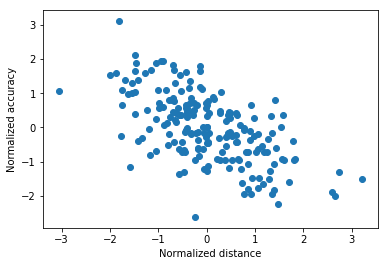

In [6]:
plt.scatter(pga['distance'], pga['accuracy'])
plt.xlabel('Normalized distance')
plt.ylabel('Normalized accuracy')
plt.show()

### Fitting a linear model

In [8]:
print("Shape of the series:", pga['distance'].shape)

Shape of the series: (197,)


In [10]:
print("Shape with newaxis:", pga['distance'][:, np.newaxis].shape)

Shape with newaxis: (197, 1)


In [11]:
# The X variable in LinearRegression.fit() must have 2 dimensions

lr = LinearRegression()
lr.fit(pga['distance'][:,np.newaxis], pga['accuracy'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
theta1 = lr.coef_[0]
theta1

-0.60759882271512144

### Defining a Cost Function

In [13]:
def cost(theta0, theta1, x, y):
    J = 0
    m = len(x)
    for i in range(m):
        h = theta1 * x[i] + theta0
        J += (h - y[i])**2
    J = J/(2*m)
    return J

### Visualizing the cost

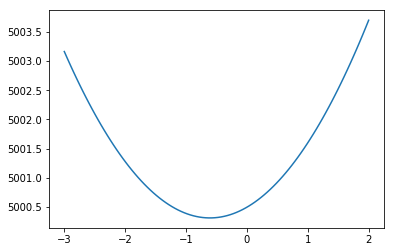

In [18]:
# 2D
theta0 = 100
theta1s = np.linspace(-3,2,100)

costs = []
for theta1 in theta1s:
    costs.append(cost(theta0, theta1, pga['distance'], pga['accuracy']))

plt.plot(theta1s, costs)
plt.show()

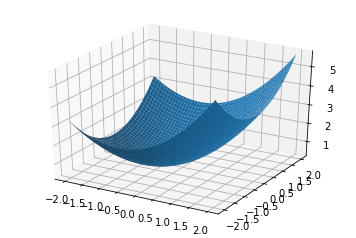

In [19]:
# 3D

theta0s = np.linspace(-2,2,100)
theta1s = np.linspace(-2,2, 100)

COST = np.empty(shape=(100,100))

T0S, T1S = np.meshgrid(theta0s, theta1s)

for i in range(100):
    for j in range(100):
        COST[i,j] = cost(T0S[0,i], T1S[j,0], pga['distance'], pga['accuracy'])

fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.plot_surface(X=T0S, Y=T1S, Z=COST)
plt.show()

### Computing Partial Derivatives

In [21]:
def partial_cost_theta1(theta0, theta1, x, y):
    h = theta0 + theta1*x
    diff = (h - y) * x
    return diff.sum() / (x.shape[0])

In [22]:
partial1 = partial_cost_theta1(0, 5, pga['distance'], pga['accuracy'])
partial1

5.5791338540719

In [23]:
def partial_cost_theta0(theta0, theta1, x, y):
    h = theta0 + theta1*x
    diff = (h - y)
    return diff.sum() / (x.shape[0])

In [24]:
partial0 = partial_cost_theta0(1, 1, pga['distance'], pga['accuracy'])
partial0

1.0000000000000104

### The Gradient Descent Algorithm

In [25]:
# x is our feature vector -- distance
# y is our target variable -- accuracy
# alpha is the learning rate
# theta0 is the initial theta0 
# theta1 is the initial theta1

def gradient_descent(x, y, alpha=0.1, theta0=0, theta1=0):
    max_epochs = 1000 # Maximum number of iterations
    counter = 0      # Initialize a counter
    c = cost(theta0, theta1, pga['distance'], pga['accuracy'])  ## Initial cost
    costs = [c]     # Lets store each update
    # Set a convergence threshold to find where the cost function in minimized
    # When the difference between the previous cost and current cost 
    #        is less than this value we will say the parameters converged
    convergence_thres = 0.000001  
    cprev = c + 10   
    theta0s = [theta0]
    theta1s = [theta1]

    # When the costs converge or we hit a large number of iterations will we stop updating
    while (np.abs(cprev - c) > convergence_thres) and (counter < max_epochs):
        cprev = c
        # Alpha times the partial derivative is our updated
        update0 = alpha * partial_cost_theta0(theta0, theta1, x, y)
        update1 = alpha * partial_cost_theta1(theta0, theta1, x, y)

        # Update theta0 and theta1 at the same time
        # We want to compute the slopes at the same set of hypothesised parameters
        # so we update after finding the partial derivatives
        theta0 -= update0
        theta1 -= update1
        
        # Store thetas
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        # Compute the new cost
        c = cost(theta0, theta1, pga['distance'], pga['accuracy'])

        # Store updates
        costs.append(c)
        counter += 1   # Count

    return {'theta0': theta0, 'theta1': theta1, "costs": costs}

Theta1 = -0.604698316638


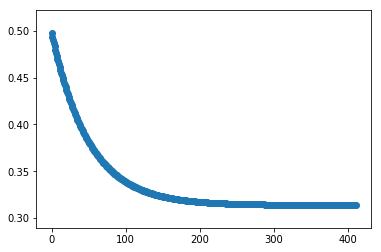

In [26]:
print("Theta1 =", gradient_descent(pga['distance'], pga['accuracy'])['theta1'])

descend = gradient_descent(pga['distance'], pga['accuracy'], alpha=.01)

plt.scatter(range(len(descend["costs"])), descend["costs"])
plt.show()